# Lab Assignment Six: CNN's

### Luis Garduno
## Brief Business Understanding
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <u>`About STL-10`</u>

Inspired by the
<a href="http://www.cs.toronto.edu/~kriz/cifar.html" target="_top"><b>CIFAR-10</b></a>
dataset, STL-10 is a dataset containing a combination of images (gathered from
<a href="http://www.image-net.org/" target="_top"><b>ImageNet</b></a>)
of animals and transportation objects. Within the dataset there are 6 animal & 4 transportation object classes:
- __Animals__ : bird, cat, deer, dog, horse, monkey
- __Transportation Objects__ : airplane, car, ship, truck

The dataset contains 3 folders that will be used at specified times:
- __Train__ : 5000 images used to train the algorithm
- __Test__ : 8000 images used to test an algorithm (800 images per class)
- __Unlabeled__ : 100,000 unlabeled image files

Aside from having not having identical classes, another difference between the datasets, is that the
images in STL-10 are 3x's the resolution of CIFAR-10's images (96x96 versus 32x32).

STL-10 is specifically an image recognition dataset. The dataset is intended to be used for developing
unsupervised feature learning, deep learning, self-taught algorithms. That being said, the primary prediction
task is to determine the type of animal or transportation object found in each of the pictures in the Unlabeled folder.
Something that should be noted about the "Unlabeled" folder, aside from it containing the the classes mentioned above,
it additionally includes other types of animals (bears, rabbits, etc.) and transportation objects[trains, buses, etc.).

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <u>`Measuring Success`</u>

One reason this data is important is if trained correctly & the prediction task is achieved, third parties that
use image captcha's for their websites, networks, etc. could use this data as a way to visualize how captcha's can
be bypassed by __unsupervised__ feature learning, which essentially defeats the purpose of having a captcha test.

In order for this data to be of use to third parties using captcha's, I believe the prediction algorithm will
have to render at least an 80% accuracy. The reason it isn't 90% is because if the prediction algorithm selects a
wrong image, or doesn't recognize an image, often times captcha test's will let you get away with about 2 or less errors.

- Choose & explain what metric(s) I will use to evaluate my algorithm’s performance.
- I should give a detailed argument for why this (these) metric(s) are appropriate on your data.
- That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task).
- (accuracy is RARELY the best evaluation metric to use. Think deeply about an appropriate measure of performance.)


-------------------------------------
Dataset : [STL-10 Kaggle Dataset](https://www.kaggle.com/jessicali9530/stl10)

Question Of Interest : Identify the type of animal or transportation object shown in the picture

----------------------------------------------

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.1 Data Preparation

In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from tkinter import Tcl
from sklearn import preprocessing

%matplotlib inline

le = preprocessing.LabelEncoder()

# Load list of labels/classes
with open('../data/stl10_binary/class_names.txt', 'r') as f:
    labels = [line.rstrip() for line in f]

print("=========== Classes ===========")
for i in range(len(labels)): print(i,":", labels[i])

=========== Classes ===========
0 : airplane
1 : bird
2 : car
3 : cat
4 : deer
5 : dog
6 : horse
7 : monkey
8 : ship
9 : truck


** Note : The dataset is found to be composed of 3 primary folders: Train, Test, & Unlabeled. Because of this, the way we load in our data, will also be the way we 'split' our data into training and testing sets.

In [2]:
# Training Dataset #########################################################################
""" Reading in the TRAINING dataset (sorted by filename) into a numpy array """
file_train = list(Tcl().call('lsort', '-dict', glob.glob('../data/STL10/Train/*.png')))
rgb_train_matrix = np.array([np.array(Image.open(file)) for file in file_train])
_, h, w, c = rgb_train_matrix.shape

""" Gather label's indices # (Training | y)"""
with open('../data/stl10_binary/train_y.bin', 'rb') as f:
    yTrain_temp = np.fromfile(f, dtype=np.uint8)
    le.fit(yTrain_temp)
    y_train = le.transform(yTrain_temp)
    
""" Create new numpy array w/ re-colored greyscaled images | TRAINING """
greyscale_train_matrix = np.array([np.array(Image.open(file).convert("L")) for file in file_train])
print
   
df_train = pd.DataFrame({'' : ['# of Samples','# of Features','Image Resolution','# of Channels','Image Size']})
df_train['Original Data']  = [_, h*w*c, '{} x {}'.format(h,w), c, str(h*w*c) + 'px\'s']
df_train['Greyscale Data']  = [_, h*w, '{} x {}'.format(h,w), 1, str(h*w) + 'px\'s']

rgb_train_vec = rgb_train_matrix.reshape((_,h*w*c))
greyscale_train_vec = greyscale_train_matrix.reshape((_,h*w))
X_train = greyscale_train_vec

print("Training Data")
df_train

Training Data


,,Original Data,Greyscale Data
0,# of Samples,5000,5000
1,# of Features,27648,9216
2,Image Resolution,96 x 96,96 x 96
3,# of Channels,3,1
4,Image Size,27648px's,9216px's


In [3]:
# Testing Dataset #########################################################################
""" Reading in the TESTING dataset (sorted by filename) into a numpy array """
file_test = list(Tcl().call('lsort', '-dict', glob.glob('../data/STL10/Test/*.png')))
rgb_test_matrix = np.array([np.array(Image.open(file)) for file in file_test])
_, h, w, c = rgb_test_matrix.shape

""" Gather label's indices # (Testing | y)"""
with open('../data/stl10_binary/test_y.bin', 'rb') as f:
    yTest_temp = np.fromfile(f, dtype=np.uint8)
    le.fit(yTest_temp)
    y_test = le.transform(yTest_temp)

""" Create new numpy array w/ re-colored greyscaled images | TESTING """
greyscale_test_matrix = np.array([np.array(Image.open(file).convert("L")) for file in file_test])

df_test = pd.DataFrame({'' : ['# of Samples','# of Features','Image Resolution','# of Channels','Image Size']})
df_test['Original Data']  = [_, h*w*c, '{} x {}'.format(h,w), c, str(h*w*c) + 'px\'s']
df_test['Greyscale Data']  = [_, h*w, '{} x {}'.format(h,w), 1, str(h*w) + 'px\'s']

rgb_test_vec = rgb_test_matrix.reshape((_,h*w*c))
greyscale_test_vec = greyscale_test_matrix.reshape((_,h*w))
X_test = greyscale_test_vec

print("Test Data")
df_test

Test Data


,,Original Data,Greyscale Data
0,# of Samples,8000,8000
1,# of Features,27648,9216
2,Image Resolution,96 x 96,96 x 96
3,# of Channels,3,1
4,Image Size,27648px's,9216px's


In [4]:
print("\n[Train] Original Matrix Shape   :  Before", rgb_train_matrix.shape, "----->  After", rgb_train_vec.shape)
print("[Train] Greyscale Matrix Shape  :  Before", greyscale_train_matrix.shape, "   ----->  After",X_train.shape)

print()

print("\n[Test] Original Matrix Shape   :  Before", rgb_test_matrix.shape, "----->  After", rgb_test_vec.shape)
print("[Test] Greyscale Matrix Shape  :  Before", greyscale_test_matrix.shape, "   ----->  After", X_test.shape)


[Train] Original Matrix Shape   :  Before (5000, 96, 96, 3) ----->  After (5000, 27648)
[Train] Greyscale Matrix Shape  :  Before (5000, 96, 96)    ----->  After (5000, 9216)


[Test] Original Matrix Shape   :  Before (8000, 96, 96, 3) ----->  After (8000, 27648)
[Test] Greyscale Matrix Shape  :  Before (8000, 96, 96)    ----->  After (8000, 9216)



-----------------------------

We begin by reading the dataset's (train & test) into numpy array's, but because they contain colored images, it would be optimal to turn these array's into only containing grayscale values so we are able to compute faster.

Then after doing so, the shape's of the original matrices and grayscale's are outputted to display the initial dimensions.
To the right of these shapes, are the concatenated versions of those matrices.

The output of _cell 10_ is created to better understand the differences between the 4
matrices, two containing _Original_ color pictures, and the other two containing
_Greyscaled_ colored images. Here is where we notice the large distance between the
image sizes for each matrix. Notice how each _Greyscaled_ picture is 3 times smaller than
the _Original_ color pictures.

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.2 Visualizing Images

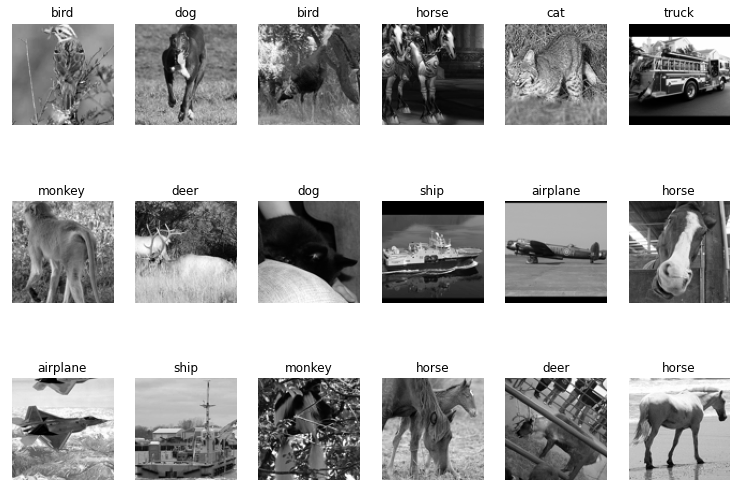

In [5]:
plt.style.use('ggplot')

def plot_gallery(images, titles, h, w, flag, n_row=3, n_col=6):
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=1.0, hspace=.25)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h,w)), cmap=plt.cm.gray)
        if flag:
            plt.title(labels[titles[i]], size=12)
        if not flag:
            plt.title(titles[i], size=12)
        plt.xticks(());  plt.yticks(())

plot_gallery(X_train, y_train, h, w, True)

Here we visualize 18 images within the training (greyscale) numpy array. This function will be helpful later
on to output certain images given a certain certain array.

----------------------------

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.3 Creating Training & Test Data

Although the dataset that is being used ([STL-10 : Kaggle](https://www.kaggle.com/jessicali9530/stl10)) has already
split the data into training & test set's, let's briefly see how this was done. The [original STL-10 dataset], uses
10 pre-defined folds on 500 training images, & 800 images for the test class, thus rendering out a total of 5,000 training
images & 8000 test images.

The code below, heavily based on the code written by [Martin Tutek](https://github.com/mttk/STL10), displays how the 5,000
training images are created.

In [6]:
# Don't run: For demonstration purposes only 

from __future__ import print_function

from imageio import imsave
from skimage.io import imshow
import os, sys, tarfile, errno, urllib

def read_labels(labels_path):
    """
    :param labels_path: path to the binary file containing labels from the STL-10 dataset
    :return: an array containing the labels
    """
    with open(labels_path, 'rb') as f:
        labels1 = np.fromfile(f, dtype=np.uint8)
        return labels1

def read_all_images(data_path):
    """
    :param data_path: the file containing the binary images from the STL-10 dataset
    :return: an array containing all the images
    """
    with open(data_path, 'rb') as f:
        # read file in uint8 chunks
        f = np.fromfile(f, dtype=np.uint8)

        # Force the data into 3x96x96 chunks, & the -1 is because of the size of the pictures heavily
        # depends on the input file so numpy is able to determine the size
        images = np.reshape(f, (-1, 3, 96, 96))

        # Transpose the images into a standard image format so that they can be display in python
        # Comment this line out if wanting to use a learning algorithm like CNN, since they like their channels separated.
        images = np.transpose(images, (0, 3, 2, 1))
        return images

def save_images(images, labels1):
    i = 0
    for image in images:
        label = labels1[i]
        directory = '../data/img/' + str(label) + '/'
        os.makedirs(directory, exist_ok=True)
        filename = directory + str(i)
        imsave("%s.png" % filename, image, format="png")
        i += 1

# Path to the binary train file: image + labels
DATA_PATH, LABEL_PATH = '../data/stl10_binary/train_X.bin', '../data/stl10_binary/train_y.bin'

# Save new images
# save_images(read_all_images(DATA_PATH),read_labels(LABEL_PATH))

----------------------------

## 2. Modeling

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.1 Training w/ Data Expansion 

In [7]:
# Import Keras libraries

import tensorflow.keras as keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import average, Reshape, Input, Add
from tensorflow.keras.layers import Conv2D, MaxPooling2D, concatenate
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
# Setup the training to use data expansion in Keras.

print("====== OLD Shapes ======")
print('Train :', X_train.shape, '\nTest  :', X_test.shape)

X_train, X_test = X_train/255.0 - 0.5, X_test/255.0 - 0.5

NUM_CLASSES = 10

# Fixing the sizes
X_train = np.expand_dims(X_train.reshape((-1, h, w)), axis=3)
X_test  = np.expand_dims(X_test.reshape((-1, h, w)),  axis=3)

# One hot encoding the output values
y_train_ohe = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test_ohe = keras.utils.to_categorical(y_test, NUM_CLASSES)

print("\n====== NEW Shapes ======")
print('Train :', X_train.shape, '\nTest  :', X_test.shape)
#print('New Shape: Rows: %d, image size: (%d,%d,%d)' % (X_train.shape[0], X_train.shape[1], X_train.shape[2], X_train.shape[3]))

====== OLD Shapes ======
Train : (5000, 9216) 
Test  : (8000, 9216)

====== NEW Shapes ======
Train : (5000, 96, 96, 1) 
Test  : (8000, 96, 96, 1)


In [9]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=5,       # used, Int. Degree range for random rotations.
    width_shift_range=0.1,  # used, Float (fraction of total width). Range for random horizontal shifts.
    height_shift_range=0.1, # used, Float (fraction of total height). Range for random vertical shifts.
    shear_range=0.,         # Float. Shear Intensity (Shear angle in counter-clockwise direction as radians)
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None)

datagen.fit(X_train)

idx = 0

(5000, 96, 96, 1)


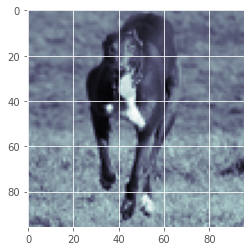

In [10]:
print(X_train.shape)
plt.subplot(1,1,1)
plt.imshow(X_train[1].squeeze(), cmap='bone')

plt.show()

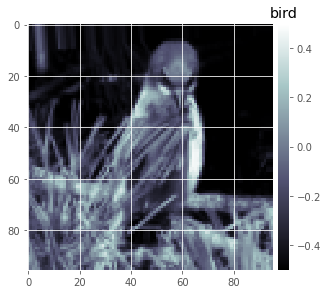

In [11]:
from skimage.io import imshow
tmps = datagen.flow(X_train, y_train_ohe, batch_size=1)

for imgs in tmps:
    imshow(imgs[0].squeeze(),cmap='bone')
    plt.title(labels[np.argmax(imgs[1])])
    break

- Explain why the chosen data expansion techniques are appropriate for my dataset.


#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.2 Exploring Convolutional Architectures (20%)


In [16]:
shpe = (h,w,1)
input_holder = Input(shape=shpe)

# Graph comparing Training & Validation Vs. Accuracy & Training loss
def getCharts(history):
    plt.figure(figsize=(10,4))
    plt.subplot(2,2,1)
    plt.plot(history.history['accuracy'])
    
    plt.ylabel('Accuracy %')
    plt.title('Training')
    plt.subplot(2,2,2)
    plt.plot(history.history['val_accuracy'])
    plt.title('Validation')
    
    plt.subplot(2,2,3)
    plt.plot(history.history['loss'])
    plt.ylabel('Training Loss')
    plt.xlabel('epochs')
    
    plt.subplot(2,2,4)
    plt.plot(history.history['val_loss'])
    plt.xlabel('epochs')


##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.2.1 Method 1: LeNet Architecture

In [17]:
# 1.) CNN - Variation 1 : Investigate a Convolutional Network Architecture --- (& investigate changing some parameters of each arch
# - Create a CNN to use on my data using Keras.

In [20]:
%%time

# now lets use the LeNet architecture with batch norm
# We will also use ReLU where approriate and drop out 

# start with a conv layer
x1 = Conv2D(filters=32, input_shape=shpe,
            kernel_size=(3,3),kernel_initializer='he_uniform', 
            kernel_regularizer=l2(l2_lambda), padding='same', 
            activation='relu', data_format="channels_last")(input_holder)

x1 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x1j)

x1 = Conv2D(filters=32,
            kernel_size=(3,3), kernel_initializer='he_uniform', 
            kernel_regularizer=l2(l2_lambda), padding='same', 
            activation='relu', data_format="channels_last")(x1)

x1_split = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x1)

x1 = Conv2D(filters=64, 
            kernel_size=(1,1), kernel_initializer='he_uniform',  
            kernel_regularizer=l2(l2_lambda), padding='same',  
            activation='relu', data_format="channels_last")(x1_split)

x1 = Conv2D(filters=64,
            kernel_size=(3,3),kernel_initializer='he_uniform', 
            kernel_regularizer=l2(l2_lambda), padding='same', 
            activation='relu', data_format="channels_last")(x1)

x1 = Conv2D(filters=32,
            kernel_size=(1,1), kernel_initializer='he_uniform', 
            kernel_regularizer=l2(l2_lambda), padding='same', 
            activation='relu', data_format="channels_last")(x1)

# now add back in the split layer, x_split (residual added in)
x1 = Add()([x1, x1_split])
x1 = Activation("relu")(x1)

x1 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x1)

x1 = Flatten()(x1)
x1 = Dropout(0.25)(x1)
x1 = Dense(256)(x1)
x1 = Activation("relu")(x1)
x1 = Dropout(0.5)(x1)
x1 = Dense(NUM_CLASSES)(x1)
x1 = Activation('softmax')(x1)

resnet_1 = Model(inputs=input_holder,outputs=x1)

resnet_1.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 96, 96, 32)   320         input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_7 (MaxPooling2D)  (None, 48, 48, 32)   0           conv2d_14[0][0]                  
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 48, 48, 32)   9248        max_pooling2d_7[0][0]            
____________________________________________________________________________________________

In [21]:
%%time

resnet_1.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                 optimizer='adam', # 'adadelta' 'rmsprop'
                 metrics=['accuracy'])

# the flow method yields batches of images indefinitely, with the given transofmrations
# resnet.fit_generator(datagen.flow(X_train, y_train_ohe, batch_size=128), 
#                       steps_per_epoch=int(len(X_train)/128), # how many generators to go through per epoch
#                       epochs=50, verbose=1,
#                       validation_data=(X_test,y_test_ohe),
#                       callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
#                      )

history_resNet1 = resnet_1.fit(X_train, y_train_ohe, batch_size=128, 
                               epochs=50, verbose=1,
                               validation_data=(X_test,y_test_ohe),
                               callbacks=[EarlyStopping(monitor='val_loss', patience=4)])

Epoch 1/50
40/40 [==============================] - 6s 145ms/step - loss: 2.3431 - accuracy: 0.1766 - val_loss: 1.9732 - val_accuracy: 0.2889
Epoch 2/50
40/40 [==============================] - 5s 130ms/step - loss: 1.9391 - accuracy: 0.2840 - val_loss: 1.7230 - val_accuracy: 0.3643
Epoch 3/50
40/40 [==============================] - 5s 132ms/step - loss: 1.7690 - accuracy: 0.3382 - val_loss: 1.5975 - val_accuracy: 0.4181
Epoch 4/50
40/40 [==============================] - 5s 130ms/step - loss: 1.6506 - accuracy: 0.3784 - val_loss: 1.5200 - val_accuracy: 0.4523
Epoch 5/50
40/40 [==============================] - 5s 130ms/step - loss: 1.5327 - accuracy: 0.4174 - val_loss: 1.4638 - val_accuracy: 0.4744
Epoch 6/50
40/40 [==============================] - 5s 131ms/step - loss: 1.4881 - accuracy: 0.4448 - val_loss: 1.3765 - val_accuracy: 0.5015
Epoch 7/50
40/40 [==============================] - 5s 131ms/step - loss: 1.4049 - accuracy: 0.4744 - val_loss: 1.3667 - val_accuracy: 0.5132
Epoch 

In [ ]:
# 2.) CNN - Variation 2 : Investigate a Convolutional Network Architecture --- (& investigate changing some parameters of each arch
# - Create a CNN to use on my data using Keras.

In [20]:
%%time

# now lets use the LeNet architecture with batch norm
# We will also use ReLU where approriate and drop out 

# start with a conv layer
x2 = Conv2D(filters=32, input_shape=shpe,
            kernel_size=(3,3),kernel_initializer='he_uniform', 
            kernel_regularizer=l2(l2_lambda), padding='same', 
            activation='relu', data_format="channels_last")(input_holder)

x2 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x2)

x2 = Conv2D(filters=32,
            kernel_size=(3,3), kernel_initializer='he_uniform', 
            kernel_regularizer=l2(l2_lambda), padding='same', 
            activation='relu', data_format="channels_last")(x2)

x2_split = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x2)

x2 = Conv2D(filters=64, 
            kernel_size=(1,1), kernel_initializer='he_uniform',  
            kernel_regularizer=l2(l2_lambda), padding='same',  
            activation='relu', data_format="channels_last")(x2_split)

x2 = Conv2D(filters=64,
            kernel_size=(3,3),kernel_initializer='he_uniform', 
            kernel_regularizer=l2(l2_lambda), padding='same', 
            activation='relu', data_format="channels_last")(x2)

x2 = Conv2D(filters=32,
            kernel_size=(1,1), kernel_initializer='he_uniform', 
            kernel_regularizer=l2(l2_lambda), padding='same', 
            activation='relu', data_format="channels_last")(x2)

# now add back in the split layer, x_split (residual added in)
x2 = Add()([x2, x2_split])
x2 = Activation("relu")(x2)

x2 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x2)

x2 = Flatten()(x2)
x2 = Dropout(0.25)(x2)
x2 = Dense(256)(x2)
x2 = Activation("relu")(x2)
x2 = Dropout(0.5)(x2)
x2 = Dense(NUM_CLASSES)(x2)
x2 = Activation('softmax')(x2)

resnet_2 = Model(inputs=input_holder,outputs=x2)

resnet_2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 96, 96, 32)   320         input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_7 (MaxPooling2D)  (None, 48, 48, 32)   0           conv2d_14[0][0]                  
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 48, 48, 32)   9248        max_pooling2d_7[0][0]            
____________________________________________________________________________________________

In [21]:
%%time

resnet_2.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                 optimizer='adam', # 'adadelta' 'rmsprop'
                 metrics=['accuracy'])

# the flow method yields batches of images indefinitely, with the given transofmrations
# resnet.fit_generator(datagen.flow(X_train, y_train_ohe, batch_size=128), 
#                       steps_per_epoch=int(len(X_train)/128), # how many generators to go through per epoch
#                       epochs=50, verbose=1,
#                       validation_data=(X_test,y_test_ohe),
#                       callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
#                      )

history_resNet2 = resnet_2.fit(X_train, y_train_ohe, batch_size=128, 
                               epochs=50, verbose=1,
                               validation_data=(X_test,y_test_ohe),
                               callbacks=[EarlyStopping(monitor='val_loss', patience=4)])

Epoch 1/50
40/40 [==============================] - 6s 145ms/step - loss: 2.3431 - accuracy: 0.1766 - val_loss: 1.9732 - val_accuracy: 0.2889
Epoch 2/50
40/40 [==============================] - 5s 130ms/step - loss: 1.9391 - accuracy: 0.2840 - val_loss: 1.7230 - val_accuracy: 0.3643
Epoch 3/50
40/40 [==============================] - 5s 132ms/step - loss: 1.7690 - accuracy: 0.3382 - val_loss: 1.5975 - val_accuracy: 0.4181
Epoch 4/50
40/40 [==============================] - 5s 130ms/step - loss: 1.6506 - accuracy: 0.3784 - val_loss: 1.5200 - val_accuracy: 0.4523
Epoch 5/50
40/40 [==============================] - 5s 130ms/step - loss: 1.5327 - accuracy: 0.4174 - val_loss: 1.4638 - val_accuracy: 0.4744
Epoch 6/50
40/40 [==============================] - 5s 131ms/step - loss: 1.4881 - accuracy: 0.4448 - val_loss: 1.3765 - val_accuracy: 0.5015
Epoch 7/50
40/40 [==============================] - 5s 131ms/step - loss: 1.4049 - accuracy: 0.4744 - val_loss: 1.3667 - val_accuracy: 0.5132
Epoch 


--------------------------------------------------------------------------------------------

##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.2.2 Method 2: Xception Style Architecture

In [ ]:
# 1.) CNN - Variation 1 : Investigate a Convolutional Network Architecture --- (& investigate changing some parameters of each arch
# - Create a CNN to use on my data using Keras.

In [ ]:
# Xception style architecture

l2_lambda = 0.000001

# start with a conv layer
x = Conv2D(filters=32, input_shape=shpe, 
           kernel_size=(3,3), kernel_initializer='he_uniform',  
           kernel_regularizer=l2(l2_lambda), padding='same',  
           activation='relu', data_format="channels_last")(input_holder)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Conv2D(filters=32, 
           kernel_size=(3,3), kernel_initializer='he_uniform',  
           kernel_regularizer=l2(l2_lambda), padding='same',  
           activation='relu', data_format="channels_last")(x)


x_split = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = SeparableConv2D(filters=32, input_shape=shpe, 
                    kernel_size=(3,3), kernel_initializer='he_uniform',  
                    kernel_regularizer=l2(l2_lambda), padding='same',  
                    activation='relu', depth_multiplier = 1, # controls output channels 
                    data_format="channels_last")(x_split)

x_split = Add()([x, x_split])

x = SeparableConv2D(filters=32, input_shape=shpe,
                    kernel_size=(3,3), kernel_initializer='he_uniform', 
                    kernel_regularizer=l2(l2_lambda), padding='same', 
                    activation='relu', depth_multiplier = 1, # controls output channels
                    data_format="channels_last")(x_split)

x_split = Add()([x, x_split])

x = Activation("relu")(x_split)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Flatten()(x)
x = Dropout(0.25)(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(NUM_CLASSES,activation="softmax")(x)

xception_1 = Model(inputs=input_holder,outputs=x)

plot_model(xception_1, show_shapes=True,show_layer_names=True, rankdir='LR', expand_nested=False, dpi=96)

#xception.summary()

In [ ]:
# speed up by training by not using augmentation, perhaps there are faster ways??
xception_1.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                 optimizer='adam', # 'adadelta' 'rmsprop'
                 metrics=['accuracy'])

history_Xception1 = xception_1.fit(X_train, y_train_ohe, batch_size=32,
             epochs=50, verbose=1, validation_data=(X_test,y_test_ohe),
             callbacks=[EarlyStopping(monitor='val_loss', patience=4)])

In [ ]:
# 2.) CNN - Variation 2 : Investigate a Convolutional Network Architecture --- (& investigate changing some parameters of each arch
# - Create a CNN to use on my data using Keras.

In [ ]:
# Xception style architecture

l2_lambda = 0.000001

# start with a conv layer
x = Conv2D(filters=32, input_shape=shpe, 
           kernel_size=(3,3), kernel_initializer='he_uniform',  
           kernel_regularizer=l2(l2_lambda), padding='same',  
           activation='relu', data_format="channels_last")(input_holder)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Conv2D(filters=32, 
           kernel_size=(3,3), kernel_initializer='he_uniform',  
           kernel_regularizer=l2(l2_lambda), padding='same',  
           activation='relu', data_format="channels_last")(x)


x_split = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = SeparableConv2D(filters=32, input_shape=shpe, 
                    kernel_size=(3,3), kernel_initializer='he_uniform',  
                    kernel_regularizer=l2(l2_lambda), padding='same',  
                    activation='relu', depth_multiplier = 1, # controls output channels 
                    data_format="channels_last")(x_split)

x_split = Add()([x, x_split])

x = SeparableConv2D(filters=32, input_shape=shpe,
                    kernel_size=(3,3), kernel_initializer='he_uniform', 
                    kernel_regularizer=l2(l2_lambda), padding='same', 
                    activation='relu', depth_multiplier = 1, # controls output channels
                    data_format="channels_last")(x_split)

x_split = Add()([x, x_split])

x = Activation("relu")(x_split)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Flatten()(x)
x = Dropout(0.25)(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(NUM_CLASSES,activation="softmax")(x)

xception_2 = Model(inputs=input_holder,outputs=x)

plot_model(xception_2, show_shapes=True,show_layer_names=True, rankdir='LR', expand_nested=False, dpi=96)

#xception.summary()

In [ ]:
# speed up by training by not using augmentation, perhaps there are faster ways??
xception_2.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                 optimizer='adam', # 'adadelta' 'rmsprop'
                 metrics=['accuracy'])

history_Xception2 = xception_2.fit(X_train, y_train_ohe, batch_size=32,
             epochs=50, verbose=1, validation_data=(X_test,y_test_ohe),
             callbacks=[EarlyStopping(monitor='val_loss', patience=4)])

- Use the method of cross validation & evaluation metric that you argued for at the beginning of the lab.
- Visualize the performance of the training & validation sets per iteration (use the "history" parameter of Keras).

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.3 (15 points)
- Visualize the final results of the CNNs & interpret the performance.
- Use proper statistics as appropriate, especially for comparing models.

In [ ]:
print("=================== Ensemble Network 1 ======================")
getCharts(history_resNet1)

print("\n=================== Ensemble Network 2 ======================")
getCharts(history_resNet2)

print("\n=================== Xception Network 1 ======================")
getCharts(history_Xception1)

print("\n=================== Xception Network 2 ======================")
getCharts(history_Xception2)

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.4 (10 points)
- Compare the performance of my convolutional network to a standard multi-layer perceptron (MLP) using the receiver operating characteristic & area under the curve.
- Use proper statistical comparison techniques.


### 3. Transfer Learning (10 points)
- [1] Use transfer learning to pre-train the weights of my initial layers of my CNN.
- [2] Compare the performance when using transfer learning to training from scratch in terms of classification performance.


### References

Kaggle. STL-10. https://www.kaggle.com/jessicali9530/stl10 (Accessed 5-1-2021)

Adam Coates, Honglak Lee, Andrew Y. Ng An Analysis of Single Layer Networks in Unsupervised Feature Learning AISTATS, 2011.
